# Logistic Regression Part II 

In the previous turotial I discussed about different metrics and simple approach to implement **Logistic Regression **. This tutorial explains following variants of logistic regression:

1. **Generalized Linear Model **
2. **Additive Logistic Regression**
3. **Logistic Regression Using Adaptive Boost**

Logistic regression is a type of **generalized linear model [1] **. Additive Logistic Regression is a variant of simple logistic regression [1]. Generalized Logistic Regression can be expressed as follows:

$$ E(Y|X_1,X_2,X_3,....,X_n) = \alpha + f_1(X_1)+ f_2(X_2)+f_3(X_3)+......+f_n(X_n) $$

where $f_1(X_1),f_2(X_2),f_3(X_3),......,f_n(X_n)$ are **_unspecified_ _non-parametric_ _function_**. 

We can determine each function using scatter plot smoother (such as cubic spline) and use an algorithm to determine _p_ _functions_. We can relate the $ \mu (X) = Pr(Y=1|X) $ to a _logit_ _link_ _function_ as follows:

$$ log(\mu (X)/1- \mu(X)) = \alpha + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 +......+\beta_n X_n$$

The above function is a weighted linear expression.

** Hastie et al.(2008,pp.299)** categorically mentioned that above weighted linear expression can be expressed in a more general function form as follows:

$$ log(\mu (X)/1- \mu(X)) = \alpha + f_1(X_1) + f_2(X_2) + f_3(X_3) +......+f_n(X_n)$$

The _link_ _function_ provides the relationship between the linear predictor and the mean of the distribution function. Please refer [3] for more details.

In this regard, I would like mention two terms, namely, **_logit_** and **_probit_**. The probit function is also used for binomial distribution but **$probit(\mu)$ = Inverse Gaussian Cumulative Distribution Function**.


In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
#Generalized Linear Model
import statsmodels.api as sm
#Adaptive Boost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler

In [4]:
df=pd.read_csv("bank.csv",sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
print(f"No of rows {df.shape[0]} and no. of columns {df.shape[1]}")

No of rows 4521 and no. of columns 17


In [6]:
print("Data type of each columns\n")
print(df.dtypes)

Data type of each columns

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [7]:
categorical_var = ["job","marital","education","default","housing","loan","contact","month","poutcome","y"]
num_var=[]
for col in df.columns:
    if col not in categorical_var:
        print(f"Nummeric Variable: {col}")
        num_var.append(col)

Nummeric Variable: age
Nummeric Variable: balance
Nummeric Variable: day
Nummeric Variable: duration
Nummeric Variable: campaign
Nummeric Variable: pdays
Nummeric Variable: previous


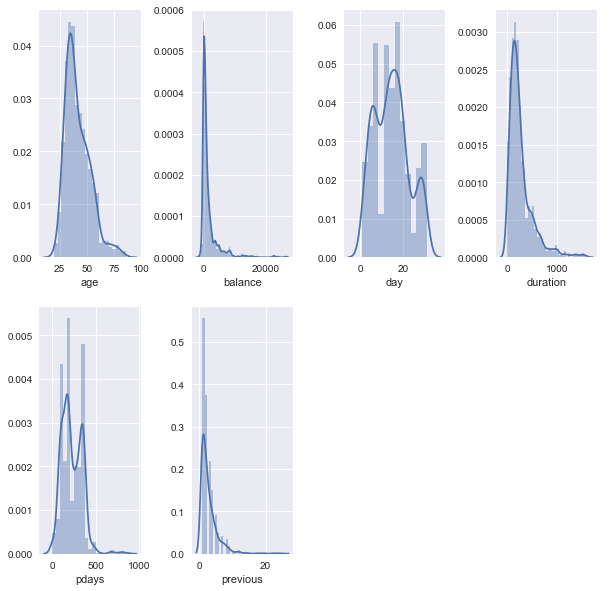

In [8]:
df_new = df[df["pdays"] > 0].reset_index()
fig,axes=plt.subplots(2,4)
nrow=0
ncol=0
for col in num_var:
    if ncol <4:
       fig.set_figheight(10)
       fig.set_figwidth(10)
       sb.distplot(df_new[col],hist=True,kde=True,ax=axes[nrow,ncol])
       ncol +=1
    else:
        nrow +=1
        ncol=0
fig.subplots_adjust(wspace=0.5) 
axes[1,2].axis("off")
axes[1,3].axis("off")
plt.show()

In [9]:
for col in num_var:
    print("Column Name:", col)
    print("Mean:",round(np.mean(df_new[col]),2))
    print("Median:",round(np.median(df_new[col]),2))
    print("Standard Deviation:",round(np.std(df_new[col]),2),)
    count=0
    for i in range(len(df_new)):
        if df_new.loc[i,col] == "" or df_new.loc[i,col]=="NA":
            count +=1
    print(f"Number of Missing Values in {col} is {count}")
    print(f"Percentage of Missing Values in {col} is {np.round(count/len(df_new),2)}\n")

Column Name: age
Mean: 41.56
Median: 39.0
Standard Deviation: 11.44
Number of Missing Values in age is 0
Percentage of Missing Values in age is 0.0

Column Name: balance
Mean: 1639.67
Median: 631.5
Standard Deviation: 3005.14
Number of Missing Values in balance is 0
Percentage of Missing Values in balance is 0.0

Column Name: day
Mean: 14.6
Median: 14.0
Standard Deviation: 7.85
Number of Missing Values in day is 0
Percentage of Missing Values in day is 0.0

Column Name: duration
Mean: 272.4
Median: 202.0
Standard Deviation: 245.21
Number of Missing Values in duration is 0
Percentage of Missing Values in duration is 0.0

Column Name: campaign
Mean: 2.02
Median: 1.0
Standard Deviation: 1.58
Number of Missing Values in campaign is 0
Percentage of Missing Values in campaign is 0.0

Column Name: pdays
Mean: 224.87
Median: 189.0
Standard Deviation: 117.13
Number of Missing Values in pdays is 0
Percentage of Missing Values in pdays is 0.0

Column Name: previous
Mean: 3.01
Median: 2.0
Standard

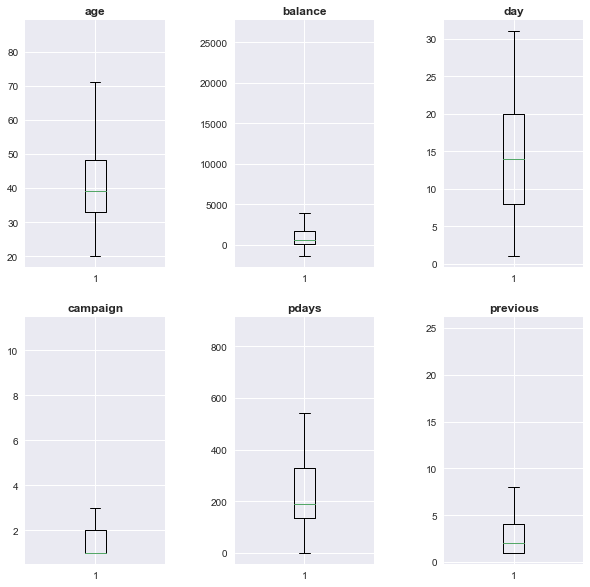

In [10]:
fig,axes = plt.subplots(2,3)
nrow=0
ncol=0

for col in num_var:
    if ncol <3:
       fig.set_figheight(10)
       fig.set_figwidth(10) 
       axes[nrow,ncol].set_title(col,fontweight="bold")
       axes[nrow,ncol].boxplot(df_new[col])
       ncol +=1
    else:
        nrow +=1
        ncol=0
fig.subplots_adjust(wspace=0.5)
plt.show()

In [11]:
print(f"Correlation Matrix of Numeric Variables {num_var}")

Correlation Matrix of Numeric Variables ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


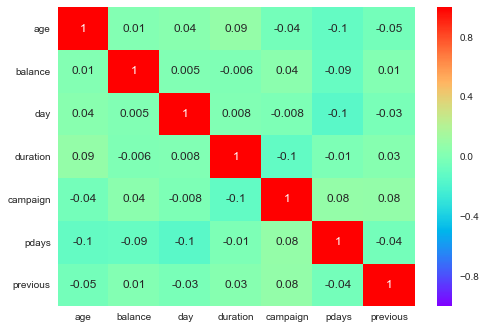

In [12]:
sb.heatmap(df_new[num_var].corr(),annot=True,fmt=".1g",cmap="rainbow")
plt.show()

In [13]:
def class_imbalance(df):
    yes = df[df["y"]=="yes"]
    no = df[df['y']== "no"]
    pyes = len(yes)*100/(len(no)+len(yes))
    pno = 100-pyes
    print("Percentage of 'Yes' Class:",round(pyes,2),"%")
    print("Percentage of No Class:",round(pno,2),"%")
    if (pyes != pno):
        print("Class Imbalance Exsists\n")
    else:
        print("No Class Imbalance Exsists\n")
    plt.figure(figsize=(4,4))
    xlab = ["Yes","No"]
    xpos =np.arange(len(xlab))
    ylab=[pyes/100,pno/100]
    plt.bar(xpos,ylab,width=0.4,alpha=0.7)
    plt.xticks(xpos,xlab)
    plt.title("Class Imblance")
    plt.legend()
    plt.show()

Percentage of 'Yes' Class: 22.55 %
Percentage of No Class: 77.45 %
Class Imbalance Exsists



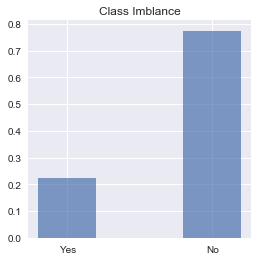

In [14]:
class_imbalance(df_new)

In [15]:
print("Total number of Categorical Variables:",len(categorical_var)-1)

Total number of Categorical Variables: 9


In [16]:
target = "y"
print("Two-way Table for Categorical Variables")
print("*"*30)
for col in categorical_var:
    if col != "y":
       print("Categorical Variable:",col)
       print(pd.crosstab(index=df_new[target],columns=df_new[col],dropna=True))
    print("*"*30)

Two-way Table for Categorical Variables
******************************
Categorical Variable: job
job  admin.  blue-collar  entrepreneur  housemaid  management  retired  \
y                                                                        
no       81          135            20         13         136       33   
yes      27           17             3          5          50       16   

job  self-employed  services  student  technician  unemployed  unknown  
y                                                                       
no              24        48       14         110          16        2  
yes              4        14        8          31           5        4  
******************************
Categorical Variable: marital
marital  divorced  married  single
y                                 
no             64      385     183
yes            21      107      56
******************************
Categorical Variable: education
education  primary  secondary  tertiary  unknown
y

In [17]:
categorical_var = ["job","marital","education","default","housing","loan","contact","month","poutcome"]
for col in categorical_var:
    dummy = pd.get_dummies(df_new[col],prefix=col)
    df_new = df_new.join(dummy)
    col_lst = [col for col in df_new.columns if col not in categorical_var]
    df_temp=df_new[col_lst]
df_temp 

,index,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,1,33,4789,11,220,1,339,4,no,0,...,0,0,0,1,0,0,0,1,0,0
1,2,35,1350,16,185,1,330,1,no,0,...,0,0,0,0,0,0,0,1,0,0
2,5,35,747,23,141,2,176,3,no,0,...,0,0,0,0,0,0,0,1,0,0
3,6,36,307,14,341,1,330,2,no,0,...,0,0,0,1,0,0,0,0,1,0
4,9,43,-88,17,313,1,147,2,no,0,...,0,0,0,0,0,0,0,1,0,0
5,14,31,360,29,89,1,241,1,no,0,...,0,0,0,0,0,0,0,1,0,0
6,17,37,2317,20,114,1,152,2,no,1,...,0,0,0,0,0,0,0,1,0,0
7,19,31,132,7,148,1,152,1,no,0,...,1,0,0,0,0,0,0,0,1,0
8,27,67,696,17,119,1,105,2,no,0,...,0,0,0,0,0,0,0,1,0,0
9,38,33,3935,6,765,1,342,2,yes,0,...,0,0,0,1,0,0,0,1,0,0


#### Generalized Linear Model (GLM) 

In [18]:
target_encoding = {"no":0,"yes":1}
Y = df_temp["y"].map(target_encoding)
#Y = df_new["y"]
X_exogenous = df_temp.drop("y",axis=1)
Y_endogenous = sm.add_constant(Y)  
model = sm.GLM(endog = Y_endogenous,exog = X_exogenous ,family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         ['const', 'y']   No. Observations:                  816
Model:                            GLM   Df Residuals:                      773
Model Family:                Binomial   Df Model:                           42
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -272.32
Date:                Mon, 21 Sep 2020   Deviance:                       289.57
Time:                        16:36:48   Pearson chi2:                     292.
No. Iterations:                     8                                         
                          coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
index               -2.851e-05   7.07e-05     -0.403      0.687        -0.000     0.000
age                    -0

#### Confusion Matrix

Statsmodel generates predicted value closer to 1. It is continuous value. Actual value, on the other hand, is discrete in nature. Confusion Matrix can't compare discrete and continuous value and it will throw error. We need to convert continuous vaue to discrete value using a threshold. Threshold value is considered to be 0.5 as we are using logistic regression or sigmoid function. Please refer the lecture notes in this regard.

In [19]:
lr_predict = result.predict(X_exogenous)
Y_predicted = []
for i in range(len(lr_predict)):
    if lr_predict[i] < 0.5 :
       Y_predicted.append(1)
    else:
        Y_predicted.append(0)

result_df = pd.DataFrame({"Y":Y,"Predicted":Y_predicted})        
confusion_matrix = confusion_matrix(result_df["Y"],result_df["Predicted"])
confusion_matrix

array([[619,  13],
       [164,  20]])

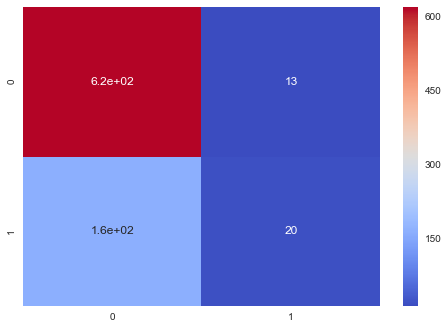

In [20]:
sb.heatmap(confusion_matrix,annot=True,cmap="coolwarm")
plt.show()

In [21]:
accuracy = accuracy_score(result_df["Predicted"],result_df["Y"])
print(f"Accuracy of Logistic Regression using Statsmodel's GLM method is {round(accuracy*100,2)}")

Accuracy of Logistic Regression using Statsmodel's GLM method is 78.31


#### Logistic Regression Using Adaptive boost 

In [22]:
std_scaler = StandardScaler()
X_exogenous = std_scaler.fit_transform(X_exogenous)

lr_model = LogisticRegression()
lr_boost_model = AdaBoostClassifier(n_estimators=10,base_estimator = lr_model,learning_rate=1)
lr_model_adaboost = lr_boost_model.fit(X_exogenous,Y)
accuracy_lr_adaboost = accuracy_score(lr_model_adaboost.predict(X_exogenous),Y)
accuracy_lr_adaboost=round(accuracy_lr_adaboost*100,2)
print(f"Accuracy of Logistic Regression Using Adaboost : {accuracy_lr_adaboost}")

Accuracy of Logistic Regression Using Adaboost : 84.68


In [23]:
print("Classifiation Report")
print(classification_report(Y,lr_model_adaboost.predict(X_exogenous)))

Classifiation Report
             precision    recall  f1-score   support

          0       0.88      0.94      0.90       632
          1       0.71      0.54      0.62       184

avg / total       0.84      0.85      0.84       816



#### Comparison of Three Methods 

In my previous tutorial, I explained the implementation technique of logistic regression using sklearn. In this tutorial, I mentioned implemention technique about **_generalized_ _linear_ _model_** and ** _logistic_ _regression_ _using_ _Adaptive_ _Boost_**. Let us compare the accuracy obtained from three different approaches:

1. Logistic Regression Using Sklearn| Accuracy = 83.82%
2. Logistic Regression Using Statsmodels GLM| Accuracy = 78.31%
3. Logistic Regression Using Adaptive Boost| Accuracy = 84.68%

It is better to use both 1 and 3. Select the best approach depending upon the accuracy score.


#### References
1. Jerome Friedman, Trevor Hastie, and Robert Tibshirani. "The Elements of Statistical Learning",$2^{nd}$ edition,2008,Springer
2. (1, 2, 3) Jerome Friedman, Trevor Hastie, and Robert Tibshirani. “Additive Logistic Regression: A Statistical View of Boosting”. The Annals of Statistics. Volume 28, Number 2 (2000), pp. 337–374
3. Logit Link Function 
https://www.sciencedirect.com/topics/mathematics/logit-link-function

**_Note_:** In this tutorial I didn't show splitting of dataset. Splitting of dataset will be discussed to understand statistical sampling. Students are requested to solve the same problem again after thourough understanding of splitting of dataset.